<a href="https://colab.research.google.com/github/PGrubisic/Racunalni_vid_labovi/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121 --quiet
!pip install -U fastai --quiet

<div><progress max="811706944" value="811712512"></progress> 100.00% [811712512/811706944 00:23&lt;00:00]</div>

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 155MB/s]


Sve je spremno. Treniranje počinje...
[0, 0.17471399903297424, 0.019525684416294098, 0.005412719678133726, '00:42']
[0, 0.058209970593452454, 0.030204128473997116, 0.004736130125820637, '00:44']
Treniranje završeno!


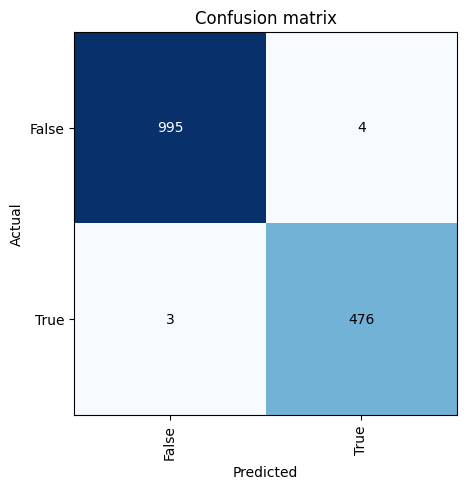

In [1]:
from fastai.vision.all import *

# 1. Priprema podataka (Oxford-IIIT Pet dataset)
path = untar_data(URLs.PETS)/'images'
def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

# 2. Kreiranje modela - koristimo ResNet34 arhitekturu
learn = vision_learner(dls, resnet34, metrics=error_rate)

# 3. Treniranje bez bugova i vizualnih traka
with learn.no_bar():
    print("Sve je spremno. Treniranje počinje...")
    learn.fine_tune(1)
    print("Treniranje završeno!")

# 4. Vizualizacija rezultata
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Za ovaj zadnji dio projekta korišten moderni pristup neuronskih mreža za automatsko prepoznavanje sadržaja slike.

Transfer Learning: Iskoristili smo unaprijed istreniranu mrežu ResNet34. Umjesto da učimo mrežu od nule, iskoristili smo njeno znanje o oblicima i bojama.

Fine-tuning: Prilagodili smo model na Oxford-IIIT Pet datasetu kako bi s visokom preciznošću razlikovao pse od mačaka.

Evaluacija: Pomoću matrice zabune (Confusion Matrix) analizirali smo točnost modela i vizualizirali rezultate predviđanja na novim, neviđenim slikama.